## Goal: predict if credit card transaction should be categorized as Fraud

# This section is to perform data aquisition and EDA (Exploratory data analysis)

Data has been downloaded from https://www.kaggle.com/competitions/ieee-fraud-detection/data 

I will be using below 2 datasets for my project:

train_transaction.csv

train_identity.csv

I have saved these 2 data files on my local machine and performing all analysis in this section

In [69]:
# Set pandas output display option when needed during exploration

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [70]:
# Set pandas output display option to lower level when exploration is done
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

In [24]:
# perform import for the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,average_precision_score,cohen_kappa_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score,precision_recall_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

import joblib
from joblib import dump,load

from matplotlib.legend_handler import HandlerLine2D

from sklearn.impute import KNNImputer
from sklearn import metrics, set_config, tree
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import keras
from keras import layers
from keras.models import load_model

#import Grid Search CV to find the parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
# To display default parameters for different classifiers

set_config(print_changed_only=False)

In [65]:
%%time 
# Read source credit card transaction dataset
source_card_transactions=pd.read_csv(r'C:\Users\pujak\Downloads\train_transaction.csv')

print('source card transactions data set has been loaded successfully.')

source card transactions data set has been loaded successfully.
Wall time: 26.9 s


In [66]:
%%time 
# Read source credit card transaction dataset
source_identity=pd.read_csv(r'C:\Users\pujak\Downloads\train_identity.csv')

print('source identity data set has been loaded successfully.')

source identity data set has been loaded successfully.
Wall time: 934 ms


In [4]:
# Display top 5 recods from the Credit card transaction dataset

source_card_transactions.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Display bottom 5 recods from the Credit card transaction dataset

source_card_transactions.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590539,3577539,0,15811131,279.95,W,15066,170.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Display top 5 recods from the Credit card identity dataset

source_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [7]:
source_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [8]:
source_card_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [67]:
%%time 

source_card_transactions_with_identity=source_card_transactions.merge(source_identity, how="left", on="TransactionID")

print('Source Final Dataset',source_card_transactions_with_identity.shape)

print("Source Data set merged into one ")

Source Final Dataset (590540, 434)
Source Data set merged into one 
Wall time: 20.7 s


In [11]:
# deleting the dataframe after processing and creating another data frame for further exploration and processing
del source_card_transactions
del source_identity

In [10]:
# Display top 5 records from source

source_card_transactions_with_identity.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [68]:
# Generating correlation matrix for all features from the source. Since there are large # of features in dataset hence
# it is difficult to review and determine which features to be eliminated and hence I have decided to perform PCA
# (Principal component analysis) on the dataset to keep only relevant features for prediction

source_card_transactions_with_identity.corr()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
TransactionID,1.000000,0.014166,0.998280,0.012025,0.010122,-0.019900,-0.010091,-0.023900,-0.000370,0.057213,-0.027043,-0.026273,-0.053154,-0.055186,-0.008896,-0.057235,0.024444,-0.050376,-0.059485,-0.060490,0.033460,-0.062073,-0.054122,-0.058796,-0.017455,-0.043123,0.074338,0.026477,-0.006997,0.058633,0.002053,0.081941,-0.071569,-0.071505,-0.015457,0.056533,0.100242,0.052536,0.023352,0.095742,0.071285,0.001609,0.043721,0.044101,0.036061,0.033277,0.037936,0.037899,0.036606,0.035126,0.012900,0.015073,0.095513,0.093682,-0.003049,-0.027305,-0.030358,-0.018493,-0.020758,0.012811,0.004417,-0.018802,-0.017885,-0.001733,-0.001529,0.008267,0.001800,-0.006796,-0.004716,0.013342,0.014974,-0.030654,-0.033514,-0.011654,0.001312,0.122415,0.119793,-0.011573,-0.003462,-0.054059,-0.045949,-0.001940,-0.060570,-0.050184,-0.006123,-0.003488,-0.022559,-0.020398,0.033435,0.033073,-0.073398,-0.035869,-0.025255,0.109545,0.106413,0.005278,0.021741,-0.039267,-0.031172,-0.022812,-0.015934,0.015731,0.014385,-0.023153,-0.012838,-0.003834,0.005375,0.006396,-0.003225,0.014323,0.015880,-0.035108,-0.027716,-0.022403,-0.007149,0.101272,0.098428,-0.002823,0.017021,-0.029226,-4.314124e-02,-0.033431,0.009284,0.008316,-0.045756,-0.028955,-0.000726,0.003122,-2.152710e-03,-0.004515,0.022317,0.022916,-0.054259,-0.044316,-0.024978,0.059641,0.066849,0.067562,0.018179,0.075549,0.064023,0.058758,0.062462,0.065413,0.061837,0.071223,0.071692,-0.022165,0.004815,0.030843,0.015882,-0.005594,0.008128,-0.001196,0.014165,0.051740,0.028589,-0.011014,0.006492,-0.005405,-0.007017,0.019939,0.004401,0.009696,0.058098,0.038253,0.058853,0.066398,0.066591,0.004234,0.067183,0.041028,0.058108,0.061456,0.064225,0.019901,0.058545,0.044327,-0.007022,0.038760,0.044782,0.022475,0.037229,0.157087,-0.248605,-0.273548,0.061851,0.059484,0.042271,0.042437,-0.306317,-0.303988,-0.237093,0.039431,0.041361,0.041873,0.041688,0.050565,0.051548,-0.302742,-0.282572,-0.014603,0.003533,-0.010569,0.167661,0.064338,-0.154957,0.135566,0.146449,0.016365,0.039247,0.137835,-0.023858,-0.012754,0.090709,0.163273,0.018667,0.134468,

In [12]:
list(source_card_transactions_with_identity.columns)

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V

In [13]:
source_card_transactions_with_identity.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
id_36              object
id_37              object
id_38              object
DeviceType         object
DeviceInfo         object
Length: 434, dtype: object

In [14]:
categorical_fields = source_card_transactions_with_identity.select_dtypes(include=object).columns.tolist()
categorical_fields

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_12',
 'id_15',
 'id_16',
 'id_23',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

In [15]:
numerical_fields = source_card_transactions_with_identity.select_dtypes(exclude=object).columns.tolist()
numerical_fields

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',


In [16]:
# Distribution of null counts in categorical features

source_card_transactions_with_identity[categorical_fields].isna().sum()

ProductCD             0
card4              1577
card6              1571
P_emaildomain     94456
R_emaildomain    453249
M1               271100
M2               271100
M3               271100
M4               281444
M5               350482
M6               169360
M7               346265
M8               346252
M9               346252
id_12            446307
id_15            449555
id_16            461200
id_23            585371
id_27            585371
id_28            449562
id_29            449562
id_30            512975
id_31            450258
id_33            517251
id_34            512735
id_35            449555
id_36            449555
id_37            449555
id_38            449555
DeviceType       449730
DeviceInfo       471874
dtype: int64

In [17]:
# Distribution of null counts in numerical features

source_card_transactions_with_identity[numerical_fields].isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
card1                  0
                   ...  
id_22             585371
id_24             585793
id_25             585408
id_26             585377
id_32             512954
Length: 403, dtype: int64

<AxesSubplot:>

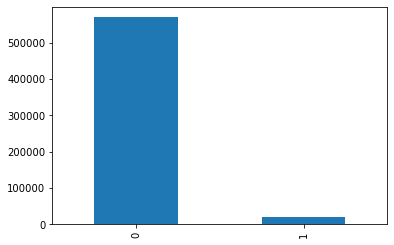

In [71]:
# Create Bar Chart to show distribution of fraud and real transactions

source_card_transactions['isFraud'].value_counts().sort_values(ascending=False).plot(kind = 'bar')

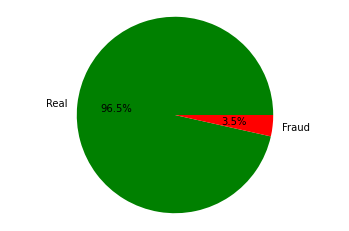

In [72]:
# Create Pie chart to show percentage distribution of fraud and real transactions 

# Check IsFraud variables that has 0 value for Real transactions and 1 for Fraud transactions

fig, ax = plt.subplots(1, 1)

ax.pie(source_card_transactions.isFraud.value_counts(),autopct='%1.1f%%', labels=['Real','Fraud'], colors=['green','r'])

plt.axis('equal')
plt.ylabel('')

plt.show()

Above distribution of transactions shows that % of Fraud transactions are very small compare to Real transactions which is what
we would expect in reality. I will be performing oversampling to this dataset later so that when using Logistic regession and DNN model then model should result in better performance.

590535    24.0
590536    24.0
590537    24.0
590538    24.0
590539    24.0
Name: TransactionDT_Hour, dtype: float64


Text(0, 0.5, '# Transactions')

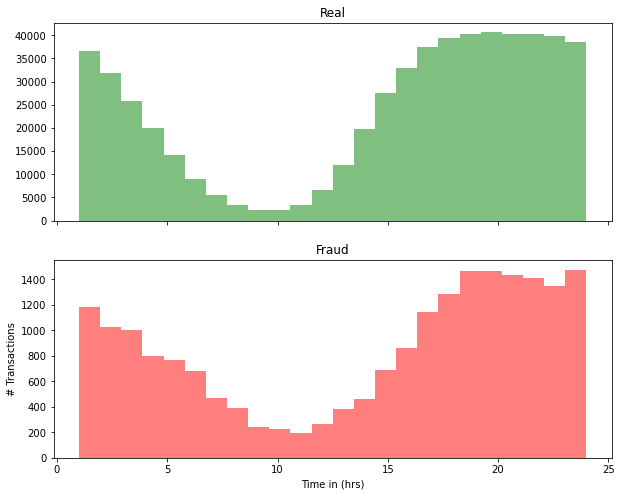

In [73]:
# Distribution of transactions based on time of the day. I want to see if particular hour of the day has any strong 
# correlation with transactipn type Real vs Fraud

source_card_transactions["TransactionDT_Hour"]= source_card_transactions["TransactionDT"]/3600%24 # convert to hours
source_card_transactions["TransactionDT_Hour"]= source_card_transactions["TransactionDT_Hour"].apply(np.ceil)
source_card_transactions["TransactionDT_Hour"]= source_card_transactions["TransactionDT_Hour"].replace(0.0,24.0)
print(source_card_transactions["TransactionDT_Hour"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(10,8))
ax1.hist(source_card_transactions.TransactionDT_Hour[source_card_transactions.isFraud==0],bins=24,color='g',alpha=0.5)
ax1.set_title('Real')
ax2.hist(source_card_transactions.TransactionDT_Hour[source_card_transactions.isFraud==1],bins=24,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time in (hrs)')
plt.ylabel('# Transactions')

Above plot shows that there is not specific hour of the day when Fraud transactions are report more or less compare to real transactions. It looks like that Fraud and Real transactions are in proportion during all the hours of the day.

Text(0, 0.5, '# transactions')

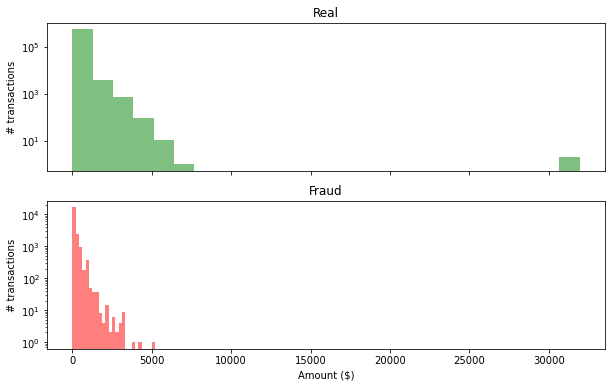

In [74]:
# Below plot is to plot distribution of feature Transaction Amount against Real and Fraud transaction to see if there is any
# pattern 

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.TransactionAmt[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.TransactionAmt[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

Based on above it does look like that Fraud transaction usually occur for comparatively smaller amount so that it is not easily
identified

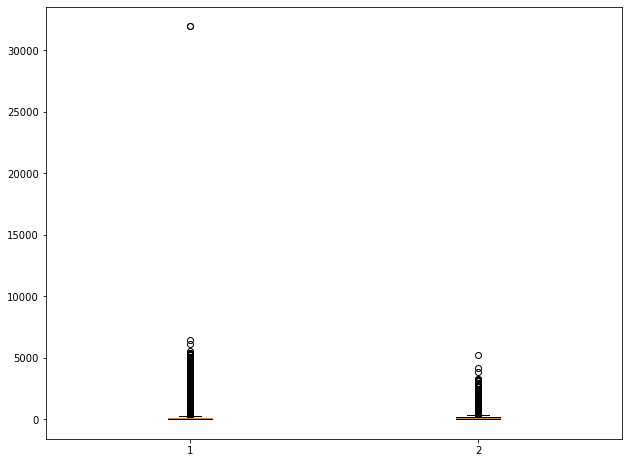

In [76]:
# Preparing box plot for showing distribution of amount for fraud and real transactions and seeany outliers and distribution

source_card_transactions_Real = source_card_transactions.TransactionAmt[source_card_transactions.isFraud==0]
source_card_transactions_Fraud = source_card_transactions.TransactionAmt[source_card_transactions.isFraud==1]

data = [source_card_transactions_Real, source_card_transactions_Fraud]
 
fig = plt.figure(figsize =(8, 6))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

Box plot result shows that there are some outliers on the amount for real transactions with extreme values.

Text(0, 0.5, '# transactions')

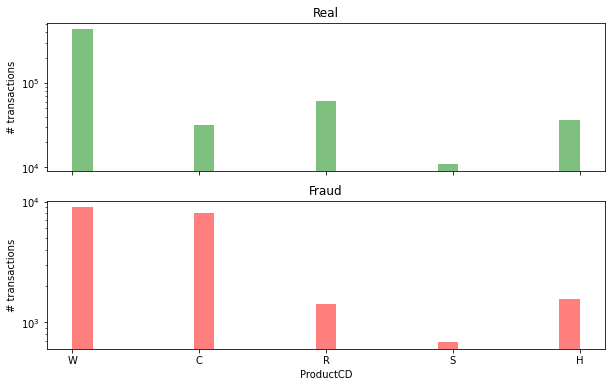

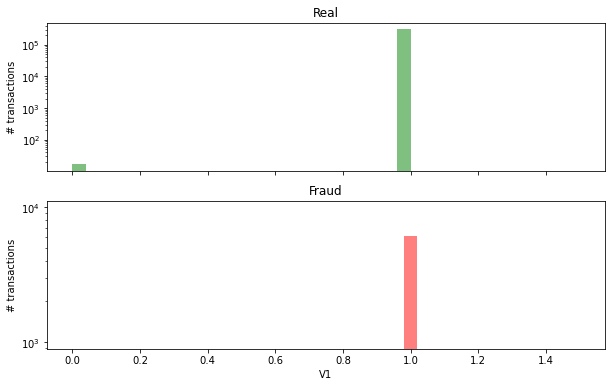

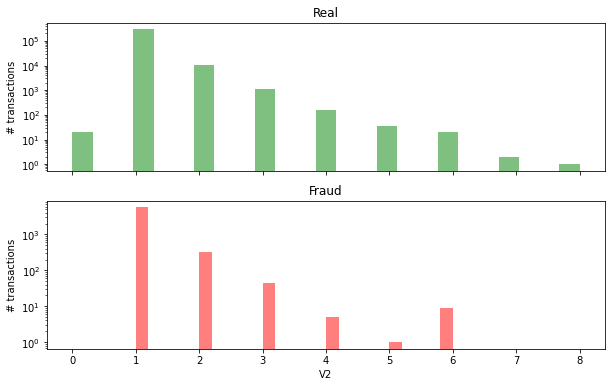

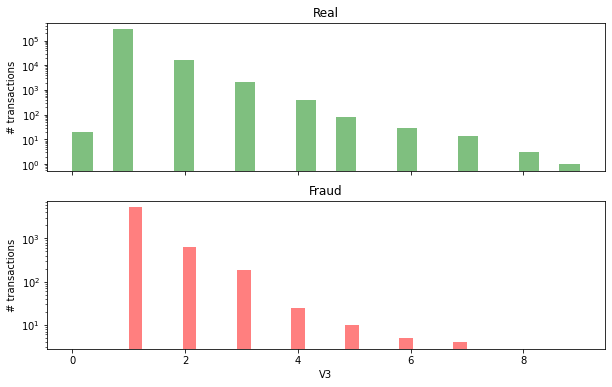

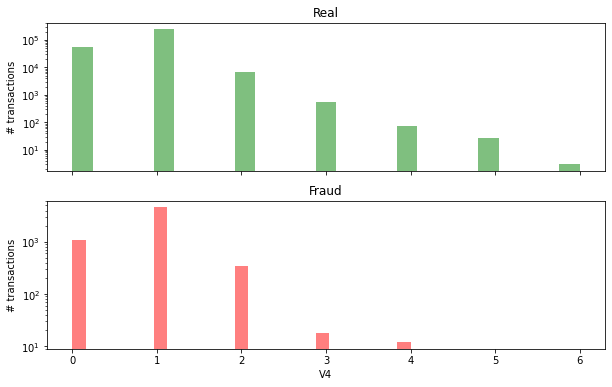

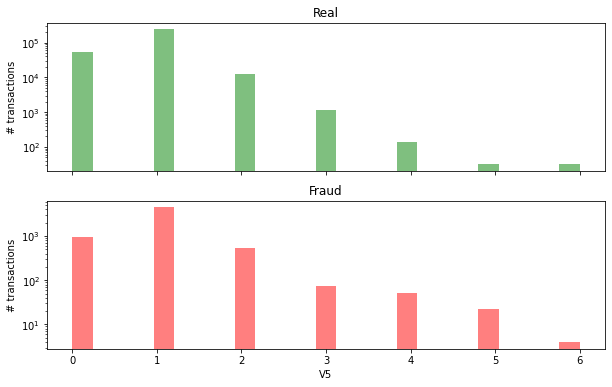

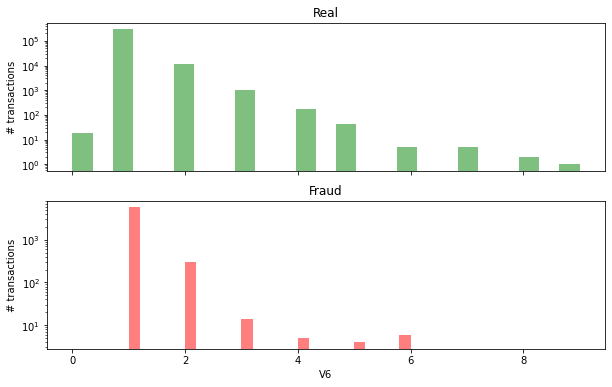

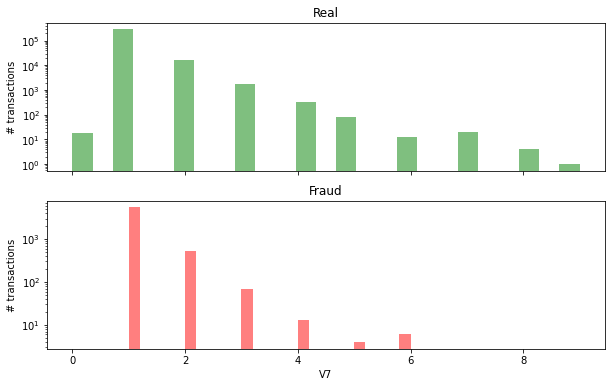

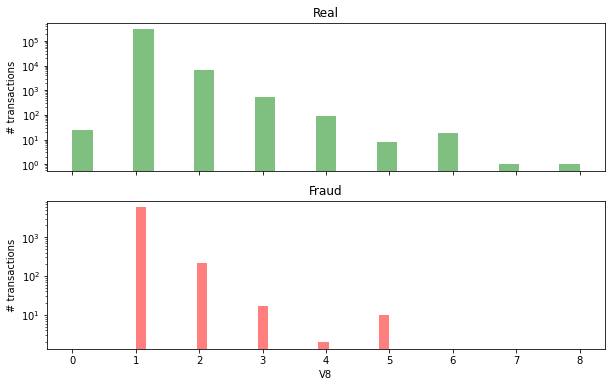

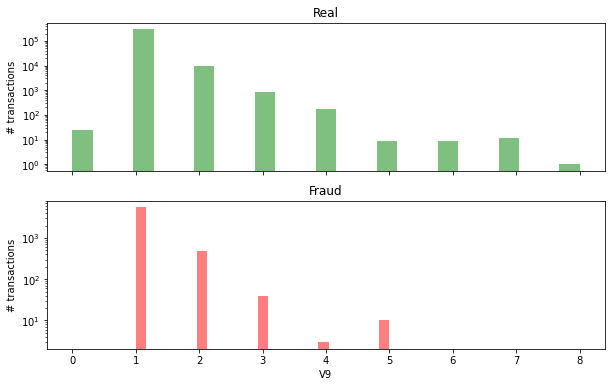

In [77]:
# There are 400+ Features in the input data source and hence I will be plotting correlations for
# 10 Features list below to get sense on how are the features related and I will be performing PCA to extract
# important features from the list of features later in this project 

# Selected Feature list =[ProductCD,V1,V2,V3,V4,V5,V6,V7,V8,V9]

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.ProductCD[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.ProductCD[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('ProductCD')
ax4.set_ylabel('# transactions')

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.V1[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.V1[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('V1')
ax4.set_ylabel('# transactions')

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.V2[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.V2[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('V2')
ax4.set_ylabel('# transactions')


fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.V3[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.V3[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('V3')
ax4.set_ylabel('# transactions')


fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.V4[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.V4[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('V4')
ax4.set_ylabel('# transactions')


fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.V5[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.V5[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('V5')
ax4.set_ylabel('# transactions')

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.V6[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.V6[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('V6')
ax4.set_ylabel('# transactions')

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.V7[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.V7[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('V7')
ax4.set_ylabel('# transactions')

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.V8[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.V8[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('V8')
ax4.set_ylabel('# transactions')

fig, (ax3,ax4) = plt.subplots(2,1, figsize = (10,6), sharex = True)
ax3.hist(source_card_transactions.V9[source_card_transactions.isFraud==0],bins=25,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Real') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(source_card_transactions.V9[source_card_transactions.isFraud==1],bins=25,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('V9')
ax4.set_ylabel('# transactions')

Above charts does not show the easily identifiable direction on the correlation of different features with target output. Since dataset has ~400 features hence it makes sense to perform automated dimensionality reduction method as well as drop features if there are lot of missing values before start building and training the model.

## This section is to perform data cleaning/preparation and perform feature engineering

In [18]:
# There are multiple categorical features in dataset with lot of null values and before one hot encoding can be performed
# We will need to perform data imputation. When missing values are significant for the feature then it makes sense to 
# drop the feature when there are 400+ features to work with.
# Drop categorical features from source if missing values are >25%

Drop_fields=[]
Dropped_fields_with_missing_percentage={}
for feature in categorical_fields:
    missing_value_percentage=round(100 * source_card_transactions_with_identity[feature].isnull().sum() / len(source_card_transactions_with_identity[feature]),2)
    if missing_value_percentage > 25.0:        
        Drop_fields.append(feature)
        Dropped_fields_with_missing_percentage[feature]=missing_value_percentage
        
source_card_transactions_with_identity.drop(columns=[feature for feature in Drop_fields], inplace=True)
        
print(Dropped_fields_with_missing_percentage)

{'R_emaildomain': 76.75, 'M1': 45.91, 'M2': 45.91, 'M3': 45.91, 'M4': 47.66, 'M5': 59.35, 'M6': 28.68, 'M7': 58.64, 'M8': 58.63, 'M9': 58.63, 'id_12': 75.58, 'id_15': 76.13, 'id_16': 78.1, 'id_23': 99.12, 'id_27': 99.12, 'id_28': 76.13, 'id_29': 76.13, 'id_30': 86.87, 'id_31': 76.25, 'id_33': 87.59, 'id_34': 86.82, 'id_35': 76.13, 'id_36': 76.13, 'id_37': 76.13, 'id_38': 76.13, 'DeviceType': 76.16, 'DeviceInfo': 79.91}


In [19]:
# Categorical fields list after removing fields with >25% missing values

categorical_fields = source_card_transactions_with_identity.select_dtypes(include=object).columns.tolist()
categorical_fields

['ProductCD', 'card4', 'card6', 'P_emaildomain']

In [20]:
# There are multiple numerical features in dataset with lot of null values. I would like to drop features with missing 
# values > 25% before we perform data imputation. When missing values are significant for the feature then it makes sense to 
# drop the feature when there are 400+ features to work with.
# Drop numerical features from source if missing values are > 25%

Drop_fields=[]
Dropped_fields_with_missing_percentage={}

for feature in numerical_fields:
    missing_value_percentage=round(100 * source_card_transactions_with_identity[feature].isnull().sum() / len(source_card_transactions_with_identity[feature]),2)
    if missing_value_percentage > 25.0:        
        Drop_fields.append(feature)
        Dropped_fields_with_missing_percentage[feature]=missing_value_percentage
        
source_card_transactions_with_identity.drop(columns=[feature for feature in Drop_fields], inplace=True)
        
print(Dropped_fields_with_missing_percentage)


{'dist1': 59.65, 'dist2': 93.63, 'D2': 47.55, 'D3': 44.51, 'D4': 28.6, 'D5': 52.47, 'D6': 87.61, 'D7': 93.41, 'D8': 87.31, 'D9': 87.31, 'D11': 47.29, 'D12': 89.04, 'D13': 89.51, 'D14': 89.47, 'V1': 47.29, 'V2': 47.29, 'V3': 47.29, 'V4': 47.29, 'V5': 47.29, 'V6': 47.29, 'V7': 47.29, 'V8': 47.29, 'V9': 47.29, 'V10': 47.29, 'V11': 47.29, 'V35': 28.61, 'V36': 28.61, 'V37': 28.61, 'V38': 28.61, 'V39': 28.61, 'V40': 28.61, 'V41': 28.61, 'V42': 28.61, 'V43': 28.61, 'V44': 28.61, 'V45': 28.61, 'V46': 28.61, 'V47': 28.61, 'V48': 28.61, 'V49': 28.61, 'V50': 28.61, 'V51': 28.61, 'V52': 28.61, 'V138': 86.12, 'V139': 86.12, 'V140': 86.12, 'V141': 86.12, 'V142': 86.12, 'V143': 86.12, 'V144': 86.12, 'V145': 86.12, 'V146': 86.12, 'V147': 86.12, 'V148': 86.12, 'V149': 86.12, 'V150': 86.12, 'V151': 86.12, 'V152': 86.12, 'V153': 86.12, 'V154': 86.12, 'V155': 86.12, 'V156': 86.12, 'V157': 86.12, 'V158': 86.12, 'V159': 86.12, 'V160': 86.12, 'V161': 86.12, 'V162': 86.12, 'V163': 86.12, 'V164': 86.12, 'V165'

In [21]:
# numerical fields list after removing fields with >25% missing values

numerical_fields = source_card_transactions_with_identity.select_dtypes(exclude=object).columns.tolist()
numerical_fields

['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D10',
 'D15',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120'

In [22]:
# display misisng value count for each of numerical fields

for feature in numerical_fields:
    count_missing=source_card_transactions_with_identity[feature].isnull().sum() 
    print(f"{feature} : {count_missing}")  

TransactionID : 0
isFraud : 0
TransactionDT : 0
TransactionAmt : 0
card1 : 0
card2 : 8933
card3 : 1565
card5 : 4259
addr1 : 65706
addr2 : 65706
C1 : 0
C2 : 0
C3 : 0
C4 : 0
C5 : 0
C6 : 0
C7 : 0
C8 : 0
C9 : 0
C10 : 0
C11 : 0
C12 : 0
C13 : 0
C14 : 0
D1 : 1269
D10 : 76022
D15 : 89113
V12 : 76073
V13 : 76073
V14 : 76073
V15 : 76073
V16 : 76073
V17 : 76073
V18 : 76073
V19 : 76073
V20 : 76073
V21 : 76073
V22 : 76073
V23 : 76073
V24 : 76073
V25 : 76073
V26 : 76073
V27 : 76073
V28 : 76073
V29 : 76073
V30 : 76073
V31 : 76073
V32 : 76073
V33 : 76073
V34 : 76073
V53 : 77096
V54 : 77096
V55 : 77096
V56 : 77096
V57 : 77096
V58 : 77096
V59 : 77096
V60 : 77096
V61 : 77096
V62 : 77096
V63 : 77096
V64 : 77096
V65 : 77096
V66 : 77096
V67 : 77096
V68 : 77096
V69 : 77096
V70 : 77096
V71 : 77096
V72 : 77096
V73 : 77096
V74 : 77096
V75 : 89164
V76 : 89164
V77 : 89164
V78 : 89164
V79 : 89164
V80 : 89164
V81 : 89164
V82 : 89164
V83 : 89164
V84 : 89164
V85 : 89164
V86 : 89164
V87 : 89164
V88 : 89164
V89 : 89164

In [23]:
# Display distinct value counts for categprical fields

(pd.DataFrame(
    source_card_transactions_with_identity[categorical_fields]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))

counts
column        value                   
P_emaildomain yahoo.co.jp           32
              servicios-ta.com      35
              hotmail.de            43
              yahoo.co.uk           49
              live.fr               56
...                                ...
card4         visa              384767
card6         charge card           15
              debit or credit       30
              credit            148986
              debit             439938

[72 rows x 1 columns]

In [24]:
# Based on above summarized distribution of categorical fields, I would like to categorize any value in the string 
# fields to "Other" when count of the corresponding value is less than 10000. This will help in reducing the # of features
# in output after applying one hot encoding. This will be applied to those Features where distinct value is more than 10.

Drop_fields=[]
Added_fields={}

for input_feature in categorical_fields:
    count_of_distinct_value=len(pd.unique(source_card_transactions_with_identity[input_feature]))
    if count_of_distinct_value >=10:
        input_feature_updated=f'{input_feature}_summary'
        input_feature_value_counts=source_card_transactions_with_identity[input_feature].value_counts()
        source_card_transactions_with_identity[input_feature_updated]=np.where(source_card_transactions_with_identity[input_feature].isin(input_feature_value_counts.index[input_feature_value_counts < 10000]) & source_card_transactions_with_identity[input_feature].notna(), 'Other',source_card_transactions_with_identity[input_feature])
        Drop_fields.append(input_feature)
        Added_fields[input_feature_updated]=count_of_distinct_value

source_card_transactions_with_identity.drop(columns=[feature for feature in Drop_fields], inplace=True)

print(Added_fields)   
print(Drop_fields)


{'P_emaildomain_summary': 60}
['P_emaildomain']


In [25]:
# Categorical fields list after summarizin fields with more than 10 distinct values

categorical_fields = source_card_transactions_with_identity.select_dtypes(include=object).columns.tolist()
categorical_fields

['ProductCD', 'card4', 'card6', 'P_emaildomain_summary']

In [26]:
# Checking the feature P_emaildomain distirbution after summarizing

source_card_transactions_with_identity['P_emaildomain_summary'].value_counts()

gmail.com        228355
yahoo.com        100934
Other             56258
hotmail.com       45250
anonymous.com     36998
aol.com           28289
Name: P_emaildomain_summary, dtype: int64

In [34]:
source_card_transactions_with_identity['ProductCD'].value_counts()

W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64

In [35]:
source_card_transactions_with_identity['card4'].value_counts()

visa                386344
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [36]:
source_card_transactions_with_identity['card6'].value_counts()

debit              441509
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

In [ ]:
# Bucket Transaction Amount Feature into 3 buckets (Low, Medium, High) using below logic
# Low – Amount < 10
# Medium - Amount between 10 and 100
# High - Amount greater than 100

feature         = 'TransactionAmt'
conditions  = [ source_card_transactions_with_identity[feature] > 100, (source_card_transactions_with_identity[feature] <= 100) & (source_card_transactions_with_identity[feature]>= 10), source_card_transactions_with_identity[feature] < 10 ]
choices     = [ "high", 'medium', 'low' ]
    
source_card_transactions_with_identity['Transaction_Amount_bucket'] = np.select(conditions, choices, default=np.nan)

In [30]:
source_card_transactions_with_identity['Transaction_Amount_bucket'].value_counts()

medium    361824
high      221921
low         6795
Name: Transaction_Amount_bucket, dtype: int64

In [32]:
# Drop original Transaction Amount Field

source_card_transactions_with_identity.drop(columns=['TransactionAmt'], inplace=True)

In [33]:
# Fill the missing values for Categorical features with most frequent values in that field

for input_feature in categorical_fields:
    missing_value_to_replace=source_card_transactions_with_identity[input_feature].value_counts().index[0]
    print(f"missing value for {input_feature} has been updated with {missing_value_to_replace}")
    source_card_transactions_with_identity[input_feature] = source_card_transactions_with_identity[input_feature].fillna(missing_value_to_replace)


missing value for ProductCD has been updated with W
missing value for card4 has been updated with visa
missing value for card6 has been updated with debit
missing value for P_emaildomain_summary has been updated with gmail.com


In [38]:
# numerical fields list before performing imputation

numerical_fields = source_card_transactions_with_identity.select_dtypes(exclude=object).columns.tolist()
numerical_fields

['TransactionID',
 'isFraud',
 'TransactionDT',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D10',
 'D15',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',

In [39]:
source_card_transactions_with_identity['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [40]:
# Fill the missing values for Categorical features with most frequent values in that field

imputer = KNNImputer(n_neighbors=5)
        
for input_feature in numerical_fields:
    missing_value_percentage=round(100 * source_card_transactions_with_identity[input_feature].isnull().sum() / len(source_card_transactions_with_identity[input_feature]),2)
    if missing_value_percentage >= 0.0 and missing_value_percentage < 10.0: 
        print(f"working on {input_feature} to update with KNN imputer")        
        source_card_transactions_with_identity[input_feature]=imputer.fit_transform(source_card_transactions_with_identity[input_feature].to_numpy().reshape(-1,1))    
        print(f"missing value for {input_feature} has been updated with KNN imputer")
    elif missing_value_percentage >= 10.0:
        missing_value_to_replace=source_card_transactions_with_identity[input_feature].value_counts().index[0]
        source_card_transactions_with_identity[input_feature] = source_card_transactions_with_identity[input_feature].fillna(missing_value_to_replace)
        print(f"missing value for {input_feature} has been updated with {missing_value_to_replace}")


working on TransactionID to update with KNN imputer
missing value for TransactionID has been updated with KNN imputer
working on isFraud to update with KNN imputer
missing value for isFraud has been updated with KNN imputer
working on TransactionDT to update with KNN imputer
missing value for TransactionDT has been updated with KNN imputer
working on card1 to update with KNN imputer
missing value for card1 has been updated with KNN imputer
working on card2 to update with KNN imputer
missing value for card2 has been updated with KNN imputer
working on card3 to update with KNN imputer
missing value for card3 has been updated with KNN imputer
working on card5 to update with KNN imputer
missing value for card5 has been updated with KNN imputer
missing value for addr1 has been updated with 299.0
missing value for addr2 has been updated with 87.0
working on C1 to update with KNN imputer
missing value for C1 has been updated with KNN imputer
working on C2 to update with KNN imputer
missing va

In [41]:
# write the imputed output from numerical_fields imputing into intermediate output so that future processing can be made quicker
%%time 
source_card_transactions_with_identity.to_csv(r'C:\Users\pujak\Downloads\intermediate_card_Transactions_identity_after_imputation.csv') 


In [42]:
del source_card_transactions_with_identity

In [25]:
%%time 
# Read intermediate credit card transaction dataset
source_card_transactions_with_identity_intermediate=pd.read_csv(r'C:\Users\pujak\Downloads\intermediate_card_Transactions_identity_after_imputation.csv', index_col=[0])

print('intermediate card transactions identity data set has been loaded successfully.')

intermediate card transactions identity data set has been loaded successfully.
Wall time: 10.2 s


In [26]:
source_card_transactions_with_identity_intermediate.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321',
       'P_emaildomain_summary', 'Transaction_Amount_bucket'],
      dtype='object', length=182)

In [27]:
# Create Target dataframe for response variable

source_card_transactions_with_identity_target=source_card_transactions_with_identity_intermediate[['isFraud']]

In [28]:
source_card_transactions_with_identity_target.value_counts()

isFraud
0.0        569877
1.0         20663
dtype: int64

In [29]:
source_card_transactions_with_identity_intermediate.drop(columns=['isFraud'], inplace=True)

In [30]:
del source_card_transactions_with_identity_intermediate

In [8]:
# check if any of the feature in data frame has missing value before performing standardization on numerical fields and 
# one hot encoding on categorical fields

for input_feature in list(source_card_transactions_with_identity_intermediate.columns):
    missing_value_count=source_card_transactions_with_identity_intermediate[input_feature].isna().sum()
    if missing_value_count > 0:
        print(f"{input_feature} has missing value with count {missing_value_count}")
print("no missing value found")

no missing value found


In [9]:
# Dropping transactionid feature from the input dataset as This is uniqely generated reandom id and I don't expect 
# TransactionId to have any correlation with target variable isFraud to detect potential Fraud transaction.

source_card_transactions_with_identity_intermediate.drop(columns=['TransactionID'], inplace=True)


In [93]:
# numerical fields list before performing standardization

numerical_fields = source_card_transactions_with_identity_intermediate.select_dtypes(exclude=object).columns.tolist()
numerical_fields

['TransactionDT',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D10',
 'D15',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 '

In [60]:
# perform standard scaler on numerical features

for input_feature in numerical_fields:
    source_card_transactions_with_identity_intermediate[input_feature] = StandardScaler().fit_transform(source_card_transactions_with_identity_intermediate[input_feature].values.reshape(-1,1))

In [92]:
source_card_transactions_with_identity_intermediate

,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,V314,V315,V316,V317,V318,V319,V320,V321,P_emaildomain_summary,Transaction_Amount_bucket
0,-1.577987,W,0.821695,-3.629961e-16,-0.282202,discover,-1.393802,credit,0.243321,0.069833,...,-0.249776,-0.229654,-0.048378,-0.032816,-0.058051,-0.055289,-0.088857,-0.074144,gmail.com,medium
1,-1.577986,W,-1.457558,2.646603e-01,-0.282202,mastercard,-2.367147,credit,0.347543,0.069833,...,-0.249776,-0.229654,-0.048378,-0.062213,-0.058051,-0.055289,-0.088857,-0.074144,gmail.com,medium
2,-1.577972,W,-1.068263,8.138473e-01,-0.282202,visa,-0.809796,debit,0.399654,0.069833,...,-0.249776,-0.229654,-0.048378,-0.062213,-0.058051,-0.055289,-0.088857,-0.074144,Other,medium
3,-1.577965,W,1.679858,1.305561e+00,-0.282202,mastercard,-2.002143,debit,1.921291,0.069833,...,-0.249776,-0.229654,-0.026352,0.290551,0.224768,-0.055289,-0.088857,-0.074144,yahoo.com,medium
4,-1.577964,H,-1.102133,9.671088e-01,-0.282202,mastercard,-2.367147,credit,1.337649,0.069833,...,-0.249776,-0.229654,-0.048378,-0.062213,-0.058051,-0.055289,-0.088857,-0.074144,gmail.com,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.827666,W,-0.683253,-3.629961e-16,-0.282202,visa,0.650221,debit,-0.204832,0.069833,...,0.026701,0.181131,-0.048378,-0.062213,-0.058051,-0.055289,-0.088857,-0.074144,gmail.com,medium
590536,1.827666,W,0.111252,-8.784150e-01,-0.282202,mastercard,0.601554,debit,-0.913540,0.069833,...,-0.249776,-0.229654,-0.048378,-0.062213,-0.058051,-0.055289,-0.088857,-0.074144,gmail.com,medium
590537,1.827673,W,0.436277,1.484366e+00,-0.282202,mastercard,0.601554,debit,-0.632142,0.069833,...,-0.249776,-0.229654,-0.048378,-0.062213,-0.058051,-0.055289,-0.088857,-0.074144,gmail.com,medium
590538,1.827675,W,-0.422906,7.563743e-01,-0.282202,mastercard,0.601554,debit,0.993718,0.069833,...,3.610522,2.490356,-0.048378,0.499094,-0.058051,-0.055289,-0.088857,-0.074144,aol.com,high


In [63]:
# categorical fields list before performing one hot encoding

categorical_fields = source_card_transactions_with_identity_intermediate.select_dtypes(include=object).columns.tolist()
categorical_fields

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain_summary',
 'Transaction_Amount_bucket']

In [62]:
# put categorical features in a separate dataframe

source_card_transactions_with_identity_intermediate_categorical=source_card_transactions_with_identity_intermediate[[categorical_field for categorical_field in categorical_fields]]

In [63]:
source_card_transactions_with_identity_intermediate_categorical

,ProductCD,card4,card6,P_emaildomain_summary,Transaction_Amount_bucket
0,W,discover,credit,gmail.com,medium
1,W,mastercard,credit,gmail.com,medium
2,W,visa,debit,Other,medium
3,W,mastercard,debit,yahoo.com,medium
4,H,mastercard,credit,gmail.com,medium
...,...,...,...,...,...
590535,W,visa,debit,gmail.com,medium
590536,W,mastercard,debit,gmail.com,medium
590537,W,mastercard,debit,gmail.com,medium
590538,W,mastercard,debit,aol.com,high


In [72]:
# put numerical features in a separate dataframe

source_card_transactions_with_identity_intermediate_numerical=source_card_transactions_with_identity_intermediate[[numerical_field for numerical_field in numerical_fields]]


In [73]:
source_card_transactions_with_identity_intermediate_numerical

,TransactionDT,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,86400.0,13926.0,362.555488,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,86401.0,2755.0,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,86469.0,4663.0,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,86499.0,18132.0,567.000000,150.0,117.0,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,135.0,50.0,1404.0,790.0,0.000000,0.000000,0.000000,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.00

In [64]:
# perform one hot encoding on categorical features

# categorical features list 
categorical_fields

# instantiate the one hot encoder and drop the first field after one hot encoding
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")

# apply the one hot encoder logic 
one_hot_encoder_output_array = one_hot_encoder.fit_transform(source_card_transactions_with_identity_intermediate_categorical[categorical_fields])


In [65]:
# Extract one hot encoded feature names using the categorical variables

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_fields)
encoder_feature_names

array(['ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W',
       'card4_discover', 'card4_mastercard', 'card4_visa', 'card6_credit',
       'card6_debit', 'card6_debit or credit',
       'P_emaildomain_summary_anonymous.com',
       'P_emaildomain_summary_aol.com', 'P_emaildomain_summary_gmail.com',
       'P_emaildomain_summary_hotmail.com',
       'P_emaildomain_summary_yahoo.com', 'Transaction_Amount_bucket_low',
       'Transaction_Amount_bucket_medium'], dtype=object)

In [66]:
# create a dataframe to hold the one hot encoded variables

one_hot_encoded_features_df = pd.DataFrame(one_hot_encoder_output_array, columns = encoder_feature_names)


In [74]:
one_hot_encoded_features_df

,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_summary_anonymous.com,P_emaildomain_summary_aol.com,P_emaildomain_summary_gmail.com,P_emaildomain_summary_hotmail.com,P_emaildomain_summary_yahoo.com,Transaction_Amount_bucket_low,Transaction_Amount_bucket_medium
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
590536,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
590537,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
590538,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [68]:
one_hot_encoded_features_df.columns

Index(['ProductCD_H', 'ProductCD_R', 'ProductCD_S', 'ProductCD_W',
       'card4_discover', 'card4_mastercard', 'card4_visa', 'card6_credit',
       'card6_debit', 'card6_debit or credit',
       'P_emaildomain_summary_anonymous.com', 'P_emaildomain_summary_aol.com',
       'P_emaildomain_summary_gmail.com', 'P_emaildomain_summary_hotmail.com',
       'P_emaildomain_summary_yahoo.com', 'Transaction_Amount_bucket_low',
       'Transaction_Amount_bucket_medium'],
      dtype='object')

In [96]:
# perform PCA analysis on numerical features and select top 30 features and check if it is explaining > 80% and if yes then 
# continue with 30 features in output for building and training the model

pca_30 =PCA(n_components=30, random_state=42)
pca_30.fit(source_card_transactions_with_identity_intermediate_numerical)
output_pca_30=pca_30.transform(source_card_transactions_with_identity_intermediate_numerical)


In [97]:
sum(pca_30.explained_variance_ratio_*100)

83.63267972318543

In [98]:
# Top 30 features from PCA output is explaining > 83% of variance hence I would move forward with this to build the model

explained_variance = pca_30.explained_variance_ratio_*100
explained_variance

array([17.68527124, 15.50233248,  5.82802737,  4.70893123,  4.14493417,
        3.6501903 ,  2.88914026,  2.41515258,  2.30646766,  1.90774482,
        1.86600057,  1.83382296,  1.7448342 ,  1.60140119,  1.48886072,
        1.44176063,  1.30611916,  1.19769127,  1.18245123,  1.11435605,
        1.06959223,  0.99790814,  0.96127979,  0.80903303,  0.77226105,
        0.7350483 ,  0.63750446,  0.62505542,  0.61642084,  0.59308634])

In [99]:
output_pca_30

array([[-1.34384056,  1.61358923, -0.39274638, ..., -0.19738625,
         0.94660503, -0.10842671],
       [-0.94014275,  0.44993371, -0.42382387, ..., -0.41946388,
         0.34533594, -0.0725469 ],
       [-1.37196901,  1.49944651, -0.38944667, ..., -0.04028922,
        -0.45995978, -0.23574537],
       ...,
       [-1.66551164,  2.1360826 , -0.12210418, ...,  0.25443281,
         0.01932046, -0.28883936],
       [ 0.36540832,  0.7586852 , -0.54544338, ..., -0.23897524,
        -0.91881352, -0.53659625],
       [-0.39064137,  2.85041786, -0.05915915, ..., -0.77405535,
         1.34812773,  1.20560923]])

In [100]:
#iterate over the components to print the explained variance
for i in range(0, 30):
    print(f"Component {i:>2} accounts for {explained_variance[i]:>2.2f}% of variance")

Component  0 accounts for 17.69% of variance
Component  1 accounts for 15.50% of variance
Component  2 accounts for 5.83% of variance
Component  3 accounts for 4.71% of variance
Component  4 accounts for 4.14% of variance
Component  5 accounts for 3.65% of variance
Component  6 accounts for 2.89% of variance
Component  7 accounts for 2.42% of variance
Component  8 accounts for 2.31% of variance
Component  9 accounts for 1.91% of variance
Component 10 accounts for 1.87% of variance
Component 11 accounts for 1.83% of variance
Component 12 accounts for 1.74% of variance
Component 13 accounts for 1.60% of variance
Component 14 accounts for 1.49% of variance
Component 15 accounts for 1.44% of variance
Component 16 accounts for 1.31% of variance
Component 17 accounts for 1.20% of variance
Component 18 accounts for 1.18% of variance
Component 19 accounts for 1.11% of variance
Component 20 accounts for 1.07% of variance
Component 21 accounts for 1.00% of variance
Component 22 accounts for 0.96

In [101]:
n_pcs= pca_30.components_.shape[0]
n_pcs

30

In [102]:
most_important = [np.abs(pca_30.components_[i]).argmax() for i in range(n_pcs)]
most_important

[161,
 51,
 17,
 108,
 136,
 165,
 64,
 172,
 31,
 40,
 145,
 40,
 76,
 164,
 80,
 38,
 153,
 15,
 154,
 82,
 137,
 154,
 115,
 50,
 23,
 100,
 101,
 6,
 4,
 5]

In [103]:
PCA_important_features=[source_card_transactions_with_identity_intermediate_numerical.columns[most_important[i]] for i in range(n_pcs)]
PCA_important_features

['V308',
 'V57',
 'C11',
 'V114',
 'V283',
 'V312',
 'V70',
 'V319',
 'V19',
 'V28',
 'V292',
 'V28',
 'V82',
 'V311',
 'V86',
 'V26',
 'V300',
 'C9',
 'V301',
 'V88',
 'V284',
 'V301',
 'V121',
 'V56',
 'D15',
 'V106',
 'V107',
 'addr2',
 'card5',
 'addr1']

In [104]:
source_card_transactions_with_identity_numerical_after_PCA=source_card_transactions_with_identity_intermediate_numerical[PCA_important_features]

In [105]:
source_card_transactions_with_identity_numerical_after_PCA

,V308,V57,C11,V114,V283,V312,V70,V319,V19,V28,...,V284,V301,V121,V56,D15,V106,V107,addr2,card5,addr1
0,-0.076248,-0.339743,-0.087363,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,-0.261636,-0.163544,-0.06375,-0.170255,-0.710143,-0.090174,0.020508,0.069833,-1.393802,0.243321
1,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,-0.261636,-0.163544,-0.06375,-0.170255,-0.710143,-0.090174,0.020508,0.069833,-2.367147,0.347543
2,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,-0.261636,-0.163544,-0.06375,-0.170255,0.898765,-0.090174,0.020508,0.069833,-0.809796,0.399654
3,0.229852,-0.339743,-0.097964,-0.084414,-0.636532,0.556719,-0.662942,-0.055289,0.398048,-0.024882,...,-0.261636,-0.163544,-0.06375,-0.170255,-0.143195,-0.090174,0.020508,0.069833,-2.002143,1.921291
4,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,-0.261636,-0.163544,-0.06375,-0.170255,-0.710143,-0.090174,0.020508,0.069833,-2.367147,1.337649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,1.206246,-0.055289,-2.090159,-0.024882,...,-0.261636,-0.163544,-0.06375,-0.170255,-0.424115,-0.090174,0.020508,0.069833,0.650221,-0.204832
590536,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,-0.261636,-0.163544,-0.06375,-0.170255,-0.710143,-0.090174,0.020508,0.069833,0.601554,-0.913540
590537,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,1.206246,-0.055289,0.398048,-0.024882,...,-0.261636,-0.163544,-0.06375,-0.170255,-0.710143,-0.090174,0.020508,0.069833,0.601554,-0.632142
590538,-0.037531,-0.339743,-0.097964,-0.084414,3.859137,0.452145,-0.662942,-0.055289,2.886256,-0.024882,...,2.693273,-0.163544,-0.06375,-0.170255,-0.597775,-0.090174,0.020508,0.069833,0.601554,0.993718


In [106]:
# concatenate the new dataframe back to the original input variables dataframe
source_card_transactions_with_identity_after_merge = pd.concat([source_card_transactions_with_identity_numerical_after_PCA.reset_index(drop=True), one_hot_encoded_features_df.reset_index(drop=True)], axis = 1)


In [108]:
source_card_transactions_with_identity_after_merge.head()

,V308,V57,C11,V114,V283,V312,V70,V319,V19,V28,...,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_summary_anonymous.com,P_emaildomain_summary_aol.com,P_emaildomain_summary_gmail.com,P_emaildomain_summary_hotmail.com,P_emaildomain_summary_yahoo.com,Transaction_Amount_bucket_low,Transaction_Amount_bucket_medium
0,-0.076248,-0.339743,-0.087363,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.229852,-0.339743,-0.097964,-0.084414,-0.636532,0.556719,-0.662942,-0.055289,0.398048,-0.024882,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [110]:
%%time 
# store preprocessed source dataset for training and testing

source_card_transactions_with_identity_after_merge.to_csv(r'C:\Users\pujak\Downloads\preprocessed_card_Transactions_identity.csv') 


Wall time: 49 s


In [120]:
del source_card_transactions_with_identity_numerical_after_PCA
del source_card_transactions_with_identity_after_merge
del source_card_transactions_with_identity_intermediate

In [32]:
%%time 
# Read preprocessed source dataset for training and testing

source_card_transactions_with_identity_after_merge=pd.read_csv(r'C:\Users\pujak\Downloads\preprocessed_card_Transactions_identity.csv',index_col=[0])

print('final preprocessed card transactions data set with identity has been loaded successfully.')

final preprocessed card transactions data set with identity has been loaded successfully.
Wall time: 5.34 s


In [33]:
source_card_transactions_with_identity_after_merge

,V308,V57,C11,V114,V283,V312,V70,V319,V19,V28,...,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_summary_anonymous.com,P_emaildomain_summary_aol.com,P_emaildomain_summary_gmail.com,P_emaildomain_summary_hotmail.com,P_emaildomain_summary_yahoo.com,Transaction_Amount_bucket_low,Transaction_Amount_bucket_medium
0,-0.076248,-0.339743,-0.087363,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.229852,-0.339743,-0.097964,-0.084414,-0.636532,0.556719,-0.662942,-0.055289,0.398048,-0.024882,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,1.206246,-0.055289,-2.090159,-0.024882,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
590536,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
590537,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,1.206246,-0.055289,0.398048,-0.024882,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
590538,-0.037531,-0.339743,-0.097964,-0.084414,3.859137,0.452145,-0.662942,-0.055289,2.886256,-0.024882,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# Rename features to make more easily confgurable for prediction through app

source_card_transactions_with_identity_after_merge.columns = source_card_transactions_with_identity_after_merge.columns.str.replace('.', '_')
source_card_transactions_with_identity_after_merge.columns = source_card_transactions_with_identity_after_merge.columns.str.replace(' ', '_')


In [35]:
source_card_transactions_with_identity_after_merge.columns

Index(['V308', 'V57', 'C11', 'V114', 'V283', 'V312', 'V70', 'V319', 'V19',
       'V28', 'V292', 'V28_1', 'V82', 'V311', 'V86', 'V26', 'V300', 'C9',
       'V301', 'V88', 'V284', 'V301_1', 'V121', 'V56', 'D15', 'V106', 'V107',
       'addr2', 'card5', 'addr1', 'ProductCD_H', 'ProductCD_R', 'ProductCD_S',
       'ProductCD_W', 'card4_discover', 'card4_mastercard', 'card4_visa',
       'card6_credit', 'card6_debit', 'card6_debit_or_credit',
       'P_emaildomain_summary_anonymous_com', 'P_emaildomain_summary_aol_com',
       'P_emaildomain_summary_gmail_com', 'P_emaildomain_summary_hotmail_com',
       'P_emaildomain_summary_yahoo_com', 'Transaction_Amount_bucket_low',
       'Transaction_Amount_bucket_medium'],
      dtype='object')

In [36]:
# Train Test Split by keeping 80% for training and 20% for testing

x=source_card_transactions_with_identity_after_merge
y=source_card_transactions_with_identity_target

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [37]:
#yTrain
yTest

,isFraud
7681,0.0
570242,0.0
340470,0.0
131781,0.0
472772,0.0
...,...
107666,0.0
36520,0.0
153737,0.0
328484,0.0


In [38]:
pd.set_option('display.max_columns', None)

In [39]:
xTest

,V308,V57,C11,V114,V283,V312,V70,V319,V19,V28,V292,V28_1,V82,V311,V86,V26,V300,C9,V301,V88,V284,V301_1,V121,V56,D15,V106,V107,addr2,card5,addr1,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit_or_credit,P_emaildomain_summary_anonymous_com,P_emaildomain_summary_aol_com,P_emaildomain_summary_gmail_com,P_emaildomain_summary_hotmail_com,P_emaildomain_summary_yahoo_com,Transaction_Amount_bucket_low,Transaction_Amount_bucket_medium
7681,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,-0.063554,-0.024882,0.335456,-0.041047,-0.142159,0.053324,-0.157322,-0.268682,-0.163544,0.025308,-0.261636,-0.163544,-0.06375,-0.170255,-0.710143,-0.090174,0.020508,0.069833,0.650221,-0.236099,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
570242,0.566065,-0.339743,-0.076763,-0.084414,-0.636532,1.131878,-0.662942,-0.055289,0.398048,-0.024882,0.996047,-0.024882,0.335456,-0.041047,-0.142159,0.053324,-0.157322,-0.088771,-0.163544,0.025308,-0.261636,-0.163544,-0.06375,-0.170255,-0.689713,-0.090174,0.020508,0.069833,-0.809796,-1.153250,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
340470,-0.076248,2.705622,-0.087363,-0.084414,-0.636532,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,-0.063554,-0.024882,0.335456,-0.041047,-0.142159,0.053324,-0.157322,-0.268682,-0.163544,0.025308,-0.261636,-0.163544,-0.06375,-0.170255,-0.434331,-0.090174,0.020508,-10.571409,0.601554,-0.079766,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
131781,-0.076248,-0.339743,-0.097964,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,-0.063554,-0.024882,0.335456,-0.041047,-0.142159,0.053324,-0.157322,-0.268682,-0.163544,0.025308,-0.261636,-0.163544,-0.06375,-0.170255,-0.710143,-0.090174,0.020508,0.069833,-0.104121,1.556515,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
472772,-0.076248,-0.339743,-0.087363,-0.084414,-0.636532,-0.227588,1.206246,-0.055289,-2.090159,-0.024882,-0.063554,-0.024882,-2.207258,-0.041047,-0.142159,0.053324,-0.157322,-0.088771,-0.163544,0.025308,-0.261636,-0.163544,-0.06375,-0.170255,2.456597,-0.090174,0.020508,0.069833,0.650221,-0.288210,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107666,0.006482,-0.339743,-0.087363,-0.084414,0.647945,1.224833,-0.662942,-0.055289,0.398048,-0.024882,-0.063554,-0.024882,0.335456,2.400983,-0.142159,0.053324,-0.157322,-0.268682,-0.163544,0.025308,2.693273,-0.163544,-0.06375,-0.170255,-0.710143,-0.090174,0.020508,0.069833,0.650221,1.848336,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
36520,-0.076248,-0.339743,-0.087363,-0.084414,0.005707,-0.227588,-0.662942,-0.055289,0.398048,-0.024882,-0.063554,-0.024882,0.335456,-0.041047,-0.142159,0.053324,-0.157322,-0.148741,-0.163544,0.025308,-0.261636,-0.163544,-0.06375,-0.170255,-0.710143,-0.090174,0.020508,0.069833,0.601554,-1.153250,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
153737,0.488944,-0.339743,-0.097964,-0.084414,-0.636532,-0.227588,1.206246,-0.055289,0.398048,-0.024882,-0.063554,-0.024882,0.335456,-0.041047,-0.142159,0.053324,-0.157322,-0.208712,-0.163544,0.025308,-0.261636,-0.163544,-0.06375,-0.170255,-0.373039,0.457717,0.020508,0.069833,-0.104121,-0.288210,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
328484,-0.059702,-0.339743,-0.076763,-0.084414,1.290184,0.062896,-0.662942,-0.055289,0.398048,-0.024882,-0.063554,-0.024882,0.335456,-0.041047,-0.142159,0.053324,-0.157322,-0.268682,-0.163544,0.025308,-0.261636,-0.163544,-0.06375,-0.170255,-0.710143,-0.090174,0.020508,0.069833,-1.199134,0.347543,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [40]:
list(xTest.columns)

['V308',
 'V57',
 'C11',
 'V114',
 'V283',
 'V312',
 'V70',
 'V319',
 'V19',
 'V28',
 'V292',
 'V28_1',
 'V82',
 'V311',
 'V86',
 'V26',
 'V300',
 'C9',
 'V301',
 'V88',
 'V284',
 'V301_1',
 'V121',
 'V56',
 'D15',
 'V106',
 'V107',
 'addr2',
 'card5',
 'addr1',
 'ProductCD_H',
 'ProductCD_R',
 'ProductCD_S',
 'ProductCD_W',
 'card4_discover',
 'card4_mastercard',
 'card4_visa',
 'card6_credit',
 'card6_debit',
 'card6_debit_or_credit',
 'P_emaildomain_summary_anonymous_com',
 'P_emaildomain_summary_aol_com',
 'P_emaildomain_summary_gmail_com',
 'P_emaildomain_summary_hotmail_com',
 'P_emaildomain_summary_yahoo_com',
 'Transaction_Amount_bucket_low',
 'Transaction_Amount_bucket_medium']

In [41]:
# Perform SMOTE on training dataset to balance observations for Fraud transactions and Real transacrions

X_resample, y_resample = SMOTE(sampling_strategy=0.4).fit_resample(xTrain, yTrain)

In [42]:
y_resample

,isFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
638144,1.0
638145,1.0
638146,1.0
638147,1.0


In [43]:
X_resample.shape

(638149, 47)

isFraud distribution as pie chart after applying SMOTE:


<Figure size 864x576 with 0 Axes>

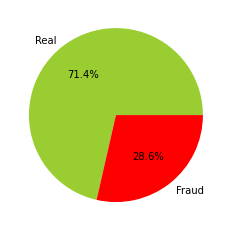

In [44]:
# Check isFraud target variable that has 0 value for Real transactions and 1 for Fraud
plt.figure(figsize=(12,8))
print("isFraud distribution as pie chart after applying SMOTE:")
fig, ax = plt.subplots(1, 1)
ax.pie(y_resample.value_counts(),autopct='%1.1f%%', labels=['Real','Fraud'], colors=['yellowgreen','r'])
plt.axis('on')
plt.ylabel('')
plt.show()

## This section is to explore building different ML models and perform tuning on the same

In [31]:
# Apply logictic regression

lr = LogisticRegression()

# using train and test dataset before perfoming SMOTE to balance the target variables in input dataset. This is to perform
# and validate if model is doing good job.

lr.fit(xTrain, yTrain)

C:\Users\pujak\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pujak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
set_config(print_changed_only=False)

In [48]:
print(lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [39]:
# Apply logistic regression using the dataset after SMOTE was performed

lr.fit(X_resample, y_resample)

C:\Users\pujak\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pujak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Using Dataset before SMOTE was performed

lr_pred,lr_prob=lr.predict(xTest),lr.predict_proba(xTest)

print(lr_pred)
print(lr_prob)

[0. 0. 0. ... 0. 0. 0.]
[[0.94713561 0.05286439]
 [0.96422716 0.03577284]
 [0.95342509 0.04657491]
 ...
 [0.99175522 0.00824478]
 [0.93775676 0.06224324]
 [0.99084151 0.00915849]]


In [40]:
# Using Dataset after SMOTE was performed
lr_pred,lr_prob=lr.predict(xTest),lr.predict_proba(xTest)

print(lr_pred)
print(lr_prob)

[0. 0. 0. ... 0. 0. 0.]
[[0.62047592 0.37952408]
 [0.74833883 0.25166117]
 [0.65482194 0.34517806]
 ...
 [0.92564455 0.07435545]
 [0.60292716 0.39707284]
 [0.9189334  0.0810666 ]]


In [33]:
# Using Dataset before SMOTE was performed

lr.score(xTrain, yTrain)

0.9665073492058116

In [41]:
# Using Dataset after SMOTE was performed

lr.score(X_resample, y_resample)

0.7879068994858568

In [34]:
lr_precision,lr_recall,_ = precision_recall_curve(yTest,lr_prob[:,1])

print(lr_precision)
print(lr_recall)

[0.03430758 0.03430787 0.03430816 ... 1.         1.         1.        ]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 4.93583416e-04
 2.46791708e-04 0.00000000e+00]


In [43]:
lr_precision,lr_recall,_ = precision_recall_curve(yTest,lr_prob[:,1])

print(lr_precision)
print(lr_recall)

[0.03430758 0.03430787 0.03430816 ... 1.         1.         1.        ]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 4.93583416e-04
 2.46791708e-04 0.00000000e+00]


In [35]:

print(metrics.accuracy_score(yTest, lr_pred))

0.9672926474074576


In [44]:

print(metrics.accuracy_score(yTest, lr_pred))

0.9163816168252785


In [30]:
addValues("Logistic Regression",yTest,lr_pred,lr_prob)

In [44]:
print_scores(yTest,lr_pred,lr_prob)

accuracy_score :  0.9672926474074576
precision_score :  0.715261958997722
recall_score :  0.07749259624876605
f1 score :  0.1398352260075707
AUC score :  0.24788530743434464
ROC_AUC score :  0.8084162372810613
kappa :  0.13402696732933128


In [45]:
print_scores(yTest,lr_pred,lr_prob)

accuracy_score :  0.9163816168252785
precision_score :  0.18768768768768768
recall_score :  0.4318854886475814
f1 score :  0.26166267942583726
AUC score :  0.234858963627541
ROC_AUC score :  0.8120603725185549
kappa :  0.22457443854951764


In [51]:
# Logistic Regression 
#log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_reg_params = {"penalty": ['l2'], 'C': [1]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_resample, y_resample)
#Getting the best parameters for the model
log_reg = grid_log_reg.best_estimator_
log_reg_score = cross_val_score(log_reg, X_resample, y_resample, cv=5)
print('Logistic Regression Cross Validation Score: ',
         round(log_reg_score.mean() * 100, 2).astype(str) + '%')

C:\Users\pujak\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pujak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pujak\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

Logistic Regression Cross Validation Score:  96.65%


C:\Users\pujak\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [163]:
# save the model with joblib library

joblib.dump(lr, 'credit_card_fraud_detection_model_lr.sav')
        

['credit_card_fraud_detection_model_lr.sav']

In [166]:
# loading the model to predict the outcome

filename = 'credit_card_fraud_detection_model_lr.sav'

model = joblib.load(filename)

In [172]:
# performing prediction manually to check if model is able to take input and generate the output successfully before deploying
# it through web application

pred = model.predict(np.array([[1,0,0,0,0,1,0,0,2,0,2,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1]]))
print(pred)


[0.]


C:\Users\pujak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [175]:
pred = model.predict(np.array([[1,0,0,0,0,1,0,0,2,0,2,0,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1.0]]))
print(pred)


[0.]


C:\Users\pujak\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [18]:
# Apply Decision Tree algorithm

dtc = DecisionTreeClassifier()
dtc.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [19]:
DT_preds,DT_probs = dtc.predict(xTest),dtc.predict_proba(xTest)

print(DT_preds)
print(DT_probs)

[0. 0. 0. ... 0. 0. 0.]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [21]:
DT_precision,DT_recall,_ = precision_recall_curve(yTest,DT_probs[:,1])

print(DT_precision)
print(DT_recall)

[0.03430758 0.14686786 0.14761329 0.14821559 0.14866017 0.14948801
 0.15006771 0.15064261 0.15106264 0.15140408 0.15183801 0.15211285
 0.15240775 0.15266554 0.1529242  0.15316448 0.1581862  0.15832409
 0.15873224 0.15906556 0.15933741 0.15957587 0.15981795 0.16030433
 0.16046358 0.16099668 0.16192195 0.16303177 0.16325155 0.16445894
 0.16542484 0.16559419 0.16575305 0.16633432 0.16662075 0.16748632
 0.16822105 0.16877401 0.1693181  0.16957956 0.16977022 0.17002111
 0.17424626 0.17474249 0.1752     0.17545905 0.17565103 0.17701589
 0.17751217 0.17802442 0.1788636  0.18049403 0.18087428 0.18143396
 0.18319212 0.18357192 0.18417211 0.1843279  0.18474825 0.18538021
 0.18578641 0.18676769 0.18718672 0.18812505 0.18902439 0.19073112
 0.19111289 0.19186561 0.19226742 0.19299523 0.19436298 0.19471193
 0.19491664 0.19552202 0.19655371 0.19710624 0.19792445 0.19807245
 0.19961419 0.20028624 0.20069175 0.20179981 0.20235254 0.20334047
 0.20409392 0.20456897 0.20625926 0.20691164 0.20731066 0.2087

In [24]:
def addValues(model_name,y_test,y_pred,y_prob):
    precision,recall,_ = precision_recall_curve(y_test,y_prob[:,1])
    scores.update({model_name : {
        'accuracy_score' : accuracy_score(y_test,y_pred),
        'precision_score' : precision_score(y_test,y_pred),
        'recall_score' : recall_score(y_test,y_pred),
        'f1_score' : f1_score(y_test,y_pred),
        'AUC_score': auc(recall,precision),
        'ROC_AUC_score': roc_auc_score(y_test, y_prob[:,1]),
        'kappa': cohen_kappa_score(y_test,y_pred)
    }})

In [26]:
scores={}

In [41]:
addValues("Decision Tree",yTest,DT_preds,DT_probs)

In [25]:
def print_scores(y_test,y_pred,y_pred_prob):
    precision,recall,_ = precision_recall_curve(y_test,y_pred_prob[:,1])
    print('accuracy_score : ',accuracy_score(y_test,y_pred))
    print('precision_score : ',precision_score(y_test,y_pred))
    print('recall_score : ',recall_score(y_test,y_pred))
    print('f1 score : ', f1_score(y_test,y_pred))
    print('AUC score : ', auc(recall,precision))
    print('ROC_AUC score : ', roc_auc_score(y_test, y_pred_prob[:,1]))
    print('kappa : ', cohen_kappa_score(y_test,y_pred))

In [42]:
print_scores(yTest,DT_preds,DT_probs)

accuracy_score :  0.9668523724049175
precision_score :  0.5184486937786157
recall_score :  0.47507403751233956
f1 score :  0.4958145524790728
AUC score :  0.44070470612982965
ROC_AUC score :  0.767554384448477
kappa :  0.478711169292137


In [69]:
source_card_transactions_with_identity_intermediate

,TransactionDT,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,P_emaildomain_summary,Transaction_Amount_bucket
0,86400.0,W,13926.0,362.555488,150.0,discover,142.0,credit,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,gmail.com,medium
1,86401.0,W,2755.0,404.000000,150.0,mastercard,102.0,credit,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,gmail.com,medium
2,86469.0,W,4663.0,490.000000,150.0,visa,166.0,debit,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,Other,medium
3,86499.0,W,18132.0,567.000000,150.0,mastercard,117.0,debit,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,135.0,50.0,1404.0,7

In [70]:
# numerical fields list before performing standardization

numerical_fields = source_card_transactions_with_identity_intermediate.select_dtypes(exclude=object).columns.tolist()
numerical_fields

['TransactionDT',
 'card1',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D10',
 'D15',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 '

In [91]:
source_card_transactions_with_identity_intermediate_numerical

,TransactionDT,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,86400.0,13926.0,362.555488,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,86401.0,2755.0,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,86469.0,4663.0,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,86499.0,18132.0,567.000000,150.0,117.0,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,135.0,50.0,1404.0,790.0,0.000000,0.000000,0.000000,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.00

In [75]:
# Option 2
# performing decision tree without performing standardization of numerical features, oversampling using SMOTE, No PCA
# performing one hot encoding on categorical features 

source_card_transactions_with_identity_before_standardization_PCA=pd.concat([source_card_transactions_with_identity_intermediate_numerical.reset_index(drop=True), one_hot_encoded_features_df.reset_index(drop=True)], axis = 1)

In [76]:
source_card_transactions_with_identity_before_standardization_PCA

,TransactionDT,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D10,D15,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W,card4_discover,card4_mastercard,card4_visa,card6_credit,card6_debit,card6_debit or credit,P_emaildomain_summary_anonymous.com,P_emaildomain_summary_aol.com,P_emaildomain_summary_gmail.com,P_emaildomain_summary_hotmail.com,P_emaildomain_summary_yahoo.com,Transaction_Amount_bucket_low,Transaction_Amount_bucket_medium
0,86400.0,13926.0,362.555488,150.0,142.0,315.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,13.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,86401.0,2755.0,404.000000,150.0,102.0,325.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,86469.0,4663.0,490.000000,150.0,166.0,330.0,87.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,315.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,86499.0,18132.0,567.000000,150.0,117.0,476.0,87.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,84.0,111.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.

In [79]:
# Rename features to make more easily confgurable for prediction through app

source_card_transactions_with_identity_before_standardization_PCA.columns = source_card_transactions_with_identity_before_standardization_PCA.columns.str.replace('.', '_')
source_card_transactions_with_identity_before_standardization_PCA.columns = source_card_transactions_with_identity_before_standardization_PCA.columns.str.replace(' ', '_')

In [80]:
%%time 
# Write output before applying standardization and PCA

source_card_transactions_with_identity_before_standardization_PCA.to_csv(r'C:\Users\pujak\Downloads\preprocessed_card_Transactions_identity_before_standardization_PCA.csv')


Wall time: 1min 47s


In [5]:
%%time
# Read preprocess data before applying standardization and PCA for decision tree and random forest algorithm

source_card_transactions_with_identity_preprocessed=pd.read_csv(r'C:\Users\pujak\Downloads\preprocessed_card_Transactions_identity_before_standardization_PCA.csv', index_col=[0])


Wall time: 13.4 s


In [82]:
del source_card_transactions_with_identity_before_standardization_PCA

In [6]:
source_card_transactions_with_identity_preprocessed.columns

Index(['TransactionDT', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',
       'C1', 'C2', 'C3',
       ...
       'card6_credit', 'card6_debit', 'card6_debit_or_credit',
       'P_emaildomain_summary_anonymous_com', 'P_emaildomain_summary_aol_com',
       'P_emaildomain_summary_gmail_com', 'P_emaildomain_summary_hotmail_com',
       'P_emaildomain_summary_yahoo_com', 'Transaction_Amount_bucket_low',
       'Transaction_Amount_bucket_medium'],
      dtype='object', length=192)

In [19]:
# Train Test Split by keeping 80% for training and 20% for testing

x=source_card_transactions_with_identity_preprocessed
y=source_card_transactions_with_identity_target

In [20]:
xTrain_option_2, xTest_option_2, yTrain_option_2, yTest_option_2 = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [21]:
print(DecisionTreeClassifier())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')


In [22]:
xTrain_option_2

,TransactionDT,card1,card2,card3,card5,addr1,addr2,C1,C2,C3,...,card6_credit,card6_debit,card6_debit_or_credit,P_emaildomain_summary_anonymous_com,P_emaildomain_summary_aol_com,P_emaildomain_summary_gmail_com,P_emaildomain_summary_hotmail_com,P_emaildomain_summary_yahoo_com,Transaction_Amount_bucket_low,Transaction_Amount_bucket_medium
216944,5069957.0,13809.0,583.0,150.0,226.0,204.0,87.0,2.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
558411,14773564.0,12695.0,490.0,150.0,226.0,325.0,87.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
369611,9207277.0,12695.0,490.0,150.0,226.0,325.0,87.0,2.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
177738,3874678.0,18132.0,567.0,150.0,117.0,204.0,87.0,137.0,122.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
259974,6225517.0,17399.0,111.0,150.0,224.0,204.0,87.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,8906146.0,18018.0,452.0,150.0,117.0,264.0,87.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
152315,3162019.0,8436.0,215.0,150.0,226.0,191.0,87.0,5.0,4.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
117952,2307868.0,14037.0,111.0,150.0,226.0,299.0,87.0,1.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
435829,11032606.0,4436.0,174.0,150.0,226.0,494.0,87.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
dtc_option_2 = DecisionTreeClassifier()
dtc_option_2.fit(xTrain_option_2,yTrain_option_2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [20]:
DT_preds,DT_probs = dtc_option_2.predict(xTest_option_2),dtc_option_2.predict_proba(xTest_option_2)

In [22]:
DT_precision,DT_recall,_ = precision_recall_curve(yTest_option_2,DT_probs[:,1])

In [27]:
addValues("Decision Tree",yTest_option_2,DT_preds,DT_probs)

In [28]:
print_scores(yTest_option_2,DT_preds,DT_probs)

accuracy_score :  0.9686134724150778
precision_score :  0.5388251181634031
recall_score :  0.5908193484698914
f1 score :  0.5636256621542082
AUC score :  0.5718412328763722
ROC_AUC score :  0.7864272445512815
kappa :  0.5473827401819011


In [57]:
type(importance)

numpy.ndarray

In [56]:
importance = dtc_option_2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print(f'Feature: {i}, score: {v}')

Feature: 0, score: 0.11954546467187192
Feature: 1, score: 0.05686477258426368
Feature: 2, score: 0.037848686586725716
Feature: 3, score: 0.012038940047235692
Feature: 4, score: 0.01719239395211973
Feature: 5, score: 0.038711615520569065
Feature: 6, score: 0.0014542443587393498
Feature: 7, score: 0.09241207988310361
Feature: 8, score: 0.014006429016109172
Feature: 9, score: 0.00018030530627532242
Feature: 10, score: 0.007608046970488468
Feature: 11, score: 0.0029718521898549964
Feature: 12, score: 0.011679144084145417
Feature: 13, score: 0.06291896641913465
Feature: 14, score: 0.010260994576798023
Feature: 15, score: 0.006743418191929856
Feature: 16, score: 0.011292123044185335
Feature: 17, score: 0.013066970539646802
Feature: 18, score: 0.007910620600979352
Feature: 19, score: 0.05098672848294735
Feature: 20, score: 0.031579349428044814
Feature: 21, score: 0.016356735261937393
Feature: 22, score: 0.010911077394033304
Feature: 23, score: 0.019022730269379375
Feature: 24, score: 0.003175

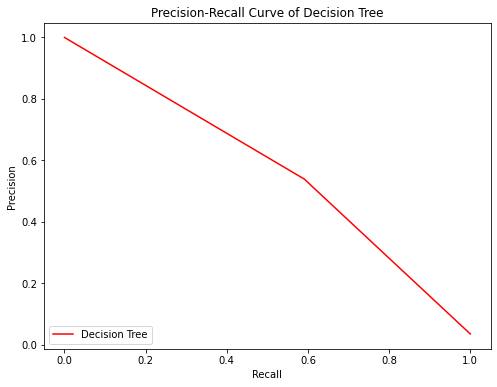

In [29]:
plt.figure(figsize=(8,6))
plt.title('Precision-Recall Curve of Decision Tree')
plt.plot(DT_recall, DT_precision, label='Decision Tree',color='Red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

In [ ]:
# plot the tree
tree.plot_tree(dtc_option_2.fit(xTrain_option_2,yTrain_option_2))

[Text(0.7649840031381085, 0.9932432432432432, 'X[13] <= 3.5\ngini = 0.068\nsamples = 472432\nvalue = [455821, 16611]'),
 Text(0.5392486370189823, 0.9797297297297297, 'X[20] <= 0.5\ngini = 0.059\nsamples = 467591\nvalue = [453302, 14289]'),
 Text(0.1889182175628129, 0.9662162162162162, 'X[7] <= 2.5\ngini = 0.245\nsamples = 28626\nvalue = [24536, 4090]'),
 Text(0.14775069720429546, 0.9527027027027027, 'X[3] <= 167.5\ngini = 0.179\nsamples = 26539\nvalue = [23904, 2635]'),
 Text(0.10073454239850223, 0.9391891891891891, 'X[8] <= 1.5\ngini = 0.13\nsamples = 21895\nvalue = [20371, 1524]'),
 Text(0.06572837323434366, 0.9256756756756757, 'X[10] <= 0.5\ngini = 0.109\nsamples = 19363\nvalue = [18239, 1124]'),
 Text(0.04781245865532616, 0.9121621621621622, 'X[11] <= 0.5\ngini = 0.079\nsamples = 11623\nvalue = [11144, 479]'),
 Text(0.04016408098418139, 0.8986486486486487, 'X[191] <= 0.5\ngini = 0.096\nsamples = 8900\nvalue = [8448, 452]'),
 Text(0.031203361106427546, 0.8851351351351351, 'X[48] <= 

Error in callback <function flush_figures at 0x000001F19B4583A0> (for post_execute):


In [47]:
# perform grid search to optimize the decision tree algorithm based model performance for our use case

# Starting with max_depths

max_depths = [1,2,4,8,16,32]
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(xTrain_option_2, yTrain_option_2)
   train_pred = dt.predict(xTrain_option_2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(yTrain_option_2, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(xTest_option_2)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(yTest_option_2, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

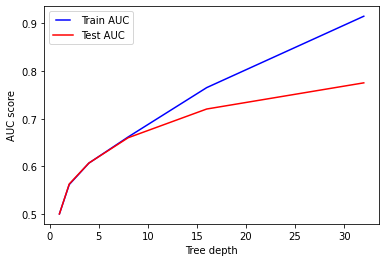

In [48]:
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [53]:
# Here I am going to use GridsearchCV to look for best parameters and passing different parameters to find best parameters
# and score. I found that data volumne is large ~500 MB (~600k observations with 400+ features) and hence I am finding the
# GridSearchCV keeps running for multiple hours and I am trying to assess model using multiple algorithm hence I am keeping
# limited number of parameters for performing gridsearch.

param_grid = {
 'max_depth':[8,16],
 'min_samples_split':[40,80],
 'min_samples_leaf': [4,8]  
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=1)
gridSearch.fit(xTrain_option_2, yTrain_option_2)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.9747392231264822
Initial parameters:  {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 40}


In [53]:
# Apply Random Forest

# Applying Ensemble techniques

RF_clf = RandomForestClassifier()

RF_clf.fit(xTrain, yTrain)

<ipython-input-53-f6aa56234677>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_clf.fit(xTrain, yTrain)


RandomForestClassifier()

In [54]:
RF_pred,RF_prob = RF_clf.predict(xTest),RF_clf.predict_proba(xTest)

In [55]:
RF_precision,RF_recall,_ = precision_recall_curve(yTest,RF_prob[:,1])

In [56]:
addValues("Random Forest Classifier",yTest,RF_pred,RF_prob)

In [57]:
print_scores(yTest,RF_pred,RF_prob)

accuracy_score :  0.9763267517865005
precision_score :  0.8096646942800789
recall_score :  0.4052319842053307
f1 score :  0.5401315789473684
AUC score :  0.5963126435844371
ROC_AUC score :  0.8911870615366304
kappa :  0.5293601534441964


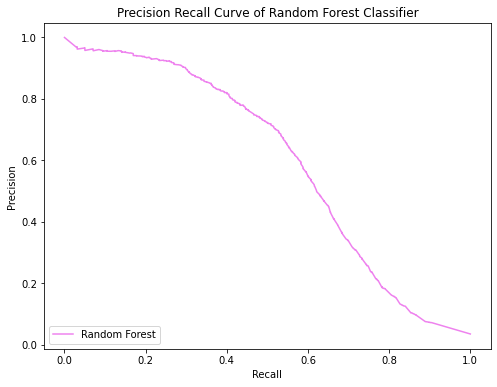

In [58]:
plt.figure(figsize=(8,6))
plt.title('Precision Recall Curve of Random Forest Classifier')
plt.plot(RF_recall, RF_precision, label='Random Forest',color='violet')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

In [83]:
set_config(print_changed_only=False)

In [59]:
# perform Random Forest modeling using data before applying standardization and PCA

RF_clf = RandomForestClassifier()

RF_clf.fit(xTrain_option_2, yTrain_option_2)

<ipython-input-59-abebd9620fd7>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_clf.fit(xTrain_option_2, yTrain_option_2)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [60]:
RF_pred,RF_prob = RF_clf.predict(xTest_option_2),RF_clf.predict_proba(xTest_option_2)

In [61]:
RF_precision,RF_recall,_ = precision_recall_curve(yTest_option_2,RF_prob[:,1])

In [62]:
addValues("Random Forest Classifier",yTest_option_2,RF_pred,RF_prob)

In [63]:
print_scores(yTest_option_2,RF_pred,RF_prob)

accuracy_score :  0.9796034138246351
precision_score :  0.8826269212855147
recall_score :  0.46767028627838103
f1 score :  0.6113889336989837
AUC score :  0.7023934536258738
ROC_AUC score :  0.9171598331946323
kappa :  0.6019289336811895


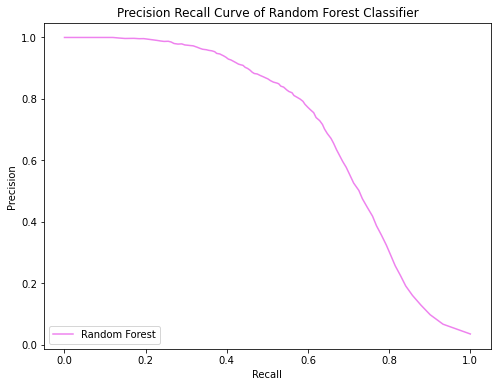

In [64]:
plt.figure(figsize=(8,6))
plt.title('Precision Recall Curve of Random Forest Classifier')
plt.plot(RF_recall, RF_precision, label='Random Forest',color='violet')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

In [58]:
# Improve Reandom Forest Model using hyperparameter tuning

print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


In [23]:
# perform grid search CV to find best parameter for the RandomForestClassfier model

param_grid = {
 'max_depth':[8,16],
 'max_features':[32,48], 
 'min_samples_split':[20,40],
 'min_samples_leaf': [4,8]  
}
gridSearch = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=5, n_jobs=1)
gridSearch.fit(xTrain_option_2, yTrain_option_2)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

C:\Users\pujak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pujak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pujak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\pujak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y wa

KeyboardInterrupt: 

In [49]:
# Apply DNN with multiple layers on the source dataset and validate the model performance

model = keras.Sequential([
layers.Dense(input_dim = 47,units= 47, activation = 'relu'),
layers.Dense(units = 20,activation = 'relu'),

layers.Dropout(0.5),

layers.Dense(units = 16,activation = 'relu'),

layers.Dense(units =1, activation = 'sigmoid'),])



In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 47)                2256      
                                                                 
 dense_1 (Dense)             (None, 20)                960       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                336       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,569
Trainable params: 3,569
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_resample, y_resample, batch_size = 16, epochs = 5)

Epoch 1/5
39885/39885 [==============================] - 62s 2ms/step - loss: 0.4158 - accuracy: 0.8137 0s - loss: 0.4158 - accuracy: 
Epoch 2/5
39885/39885 [==============================] - 60s 2ms/step - loss: 0.3773 - accuracy: 0.8362
Epoch 3/5
39885/39885 [==============================] - 60s 2ms/step - loss: 0.3612 - accuracy: 0.8443
Epoch 4/5
39885/39885 [==============================] - 61s 2ms/step - loss: 0.3497 - accuracy: 0.8504
Epoch 5/5
39885/39885 [==============================] - 61s 2ms/step - loss: 0.3425 - accuracy: 0.8538


In [53]:
Dnn_prob= model.predict(xTest)

In [54]:
Dnn_prob

array([[0.26169726],
       [0.21951014],
       [0.2378951 ],
       ...,
       [0.14218497],
       [0.7211176 ],
       [0.2825206 ]], dtype=float32)

In [55]:
Dnn_preds= model.predict_classes(xTest)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [57]:
threshold =0.5
Dnn_preds=np.where(Dnn_prob > threshold, 1,0)

In [58]:
Dnn_preds

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [60]:
scores={}

In [61]:
DNN_precision,DNN_recall,_ = precision_recall_curve(yTest,Dnn_prob)

scores.update({'DNN' : {
        'accuracy_score' : accuracy_score(yTest,Dnn_preds.round()),
        'precision_score' : precision_score(yTest,Dnn_preds.round()),
        'recall_score' : recall_score(yTest,Dnn_preds.round()),
        'f1_score' : f1_score(yTest,Dnn_preds.round()),
        'AUC_score': auc(DNN_recall,DNN_precision),
        'ROC_AUC_score': roc_auc_score(yTest, Dnn_prob),
        'kappa': cohen_kappa_score(yTest,Dnn_preds.round())
    }})

In [62]:
scores['DNN']

{'accuracy_score': 0.9206912317539879,
 'precision_score': 0.23892327340603203,
 'recall_score': 0.6001974333662389,
 'f1_score': 0.3417890520694259,
 'AUC_score': 0.42348921384321686,
 'ROC_AUC_score': 0.8696341314662906,
 'kappa': 0.3078179081103811}

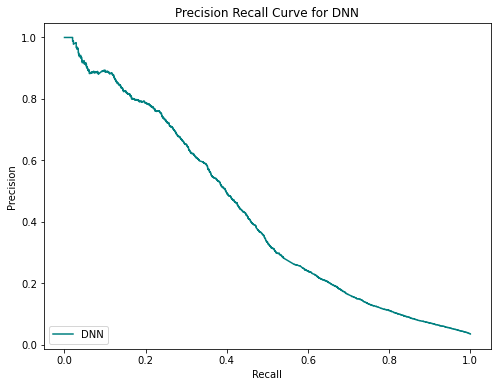

In [63]:
plt.figure(figsize=(8,6))
plt.plot(DNN_recall, DNN_precision, label='DNN',color='teal')
plt.title('Precision Recall Curve for DNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


# Conclusion:

I worked on extracing performance for all 4 models created using below algorithms:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. DNN (Deep Neural Network)

Performed hypertuning on model created using Decision Tree and Random Forest algorithms as I found these 2 algorithms have better output scores.

Finally I found model using Random Forest algorithms have best performance among all 4 models.